# K-Means

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Mall_Customers (1).csv')

In [ ]:
print('Dataframe shape:', data.shape)
data.head(8)


Dataframe shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


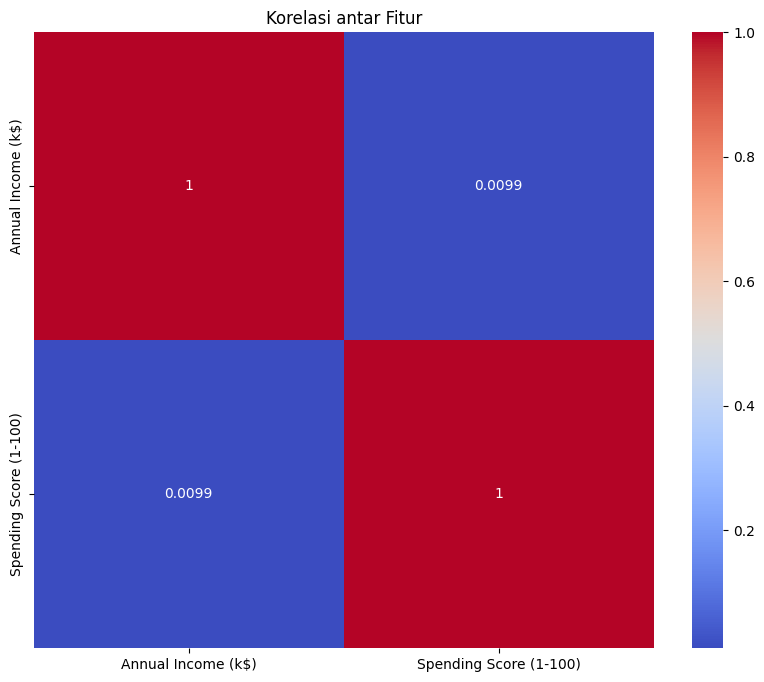

In [ ]:
# Select only the numeric columns for correlation calculation
numeric_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(10, 8))
# Calculate correlation only on numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


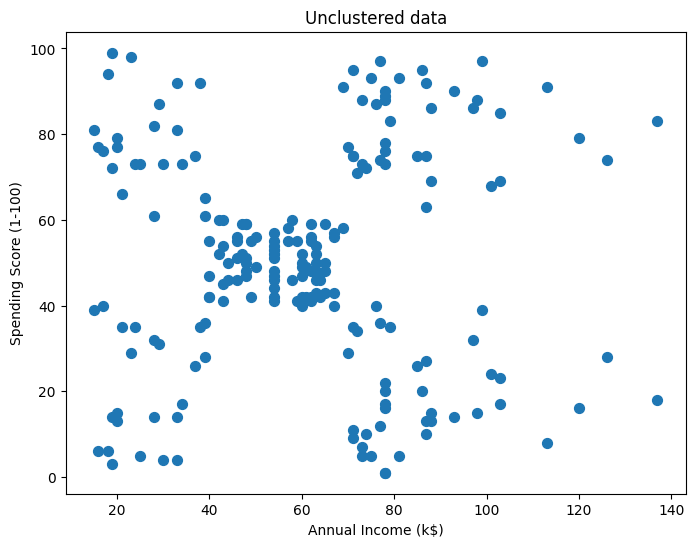

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Unclustered data')
plt.show()

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values




In [ ]:
# Normalisasi Min-Max
#X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [ ]:
# Normalisasi Z-Score
#X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)


In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Normalisasi Min-Max
#X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Normalisasi Z-Score
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0) # Uncomment this line and assign to X_normalized

def split_data(X, test_ratio=0.2, seed=42):
    """
    Membagi data menjadi train dan test set secara acak.

    Args:
        X (ndarray): Data asli (n_samples, features)
        test_ratio (float): Proporsi data test
        seed (int): Random seed untuk reprodusibilitas

    Returns:
        X_train, X_test: ndarray
    """
    np.random.seed(seed)
    n_samples = X.shape[0]
    n_test = int(n_samples * test_ratio)
    indices = np.random.permutation(n_samples)
    test_idx = indices[:n_test]
    train_idx = indices[n_test:]
    return X[train_idx], X[test_idx]

# Terapkan split setelah normalisasi
X_train, X_test = split_data(X_normalized, test_ratio=0.2) # X_normalized is now defined

# Lihat bentuk datanya
print("Jumlah data train:", X_train.shape)
print("Jumlah data test:", X_test.shape)

Jumlah data train: (160, 2)
Jumlah data test: (40, 2)


In [ ]:

def euclidean_distance(a, b):
    """
    Menghitung jarak Euclidean antara dua vektor.

    Args:
        a (np.array): Vektor pertama
        b (np.array): Vektor kedua

    Returns:
        float: Jarak Euclidean antara a dan b
    """
    return np.sqrt(np.sum((a - b) ** 2))


In [ ]:
# Ambil dua pelanggan pertama dan hitung jaraknya
pelanggan_1 = X[0]  # [15, 39]
pelanggan_2 = X[1]  # [15, 81]
jarak_euclidean = euclidean_distance(pelanggan_1, pelanggan_2)
jarak_euclidean

np.float64(42.0)

In [ ]:
def kmeans_manual(X, k, max_iter=100):
    """
    Menerapkan algoritma K-Means dari nol

    Args:
        X (ndarray): Data pelanggan (n_samples, 2)
        k (int): Jumlah cluster
        max_iter (int): Maksimum iterasi untuk konvergensi

    Returns:
        centroids (ndarray): Posisi akhir setiap centroid (k, 2)
        labels (ndarray): Label cluster untuk setiap data (n_samples,)
        n_iter (int): Jumlah iterasi yang dijalankan
    """
    np.random.seed(42)  # Untuk hasil tetap
    n_samples = X.shape[0]

    # 1. Inisialisasi centroid secara acak dari data
    random_indices = np.random.choice(n_samples, size=k, replace=False)
    centroids = X[random_indices]

    for iteration in range(max_iter):
        # 2. Hitung jarak setiap data ke setiap centroid
        labels = []
        for i in range(n_samples):
            # Correct the function call from euclidean_distance_customer to euclidean_distance
            distances = [euclidean_distance(X[i], centroid) for centroid in centroids]
            cluster = np.argmin(distances)
            labels.append(cluster)
        labels = np.array(labels)

        # 3. Simpan centroid sebelumnya untuk pengecekan konvergensi
        prev_centroids = centroids.copy()

        # 4. Update centroid: rata-rata data dalam setiap cluster
        for j in range(k):
            cluster_points = X[labels == j]
            if len(cluster_points) > 0:
                centroids[j] = np.mean(cluster_points, axis=0)

        # 5. Cek konvergensi: jika centroid tidak berubah, berhenti
        if np.allclose(centroids, prev_centroids):
            break

    return centroids, labels, iteration + 1

In [ ]:
# Misal kita ingin mengelompokkan data ke dalam 3 cluster
centroids, labels, n_iter = kmeans_manual(X, k=3)
print("Centroid akhir:\n", centroids)
print("Jumlah iterasi:", n_iter)



Centroid akhir:
 [[86 82]
 [44 49]
 [87 18]]
Jumlah iterasi: 16


In [ ]:
 # Inisialisasi list untuk menyimpan hasil WCSS
wcss_values = []
k_range = range(1, 11)




In [ ]:
def calculate_wcss(X, centroids, labels):
    """
    Menghitung Within-Cluster Sum of Squares (WCSS).

    Args:
        X (ndarray): Data pelanggan (n_samples, 2)
        centroids (ndarray): Posisi setiap centroid (k, 2)
        labels (ndarray): Label cluster untuk setiap data (n_samples,)

    Returns:
        float: Nilai WCSS
    """
    wcss = 0
    for i in range(len(X)):
        # Hitung jarak dari data ke centroid yang ditugaskan padanya
        # Fix: Change euclidean_distance_customer to euclidean_distance
        jarak = euclidean_distance(X[i], centroids[labels[i]])
        wcss += jarak ** 2  # kuadratkan jaraknya
    return wcss

In [ ]:
# Loop K = 1 hingga 10
for k in k_range:
    centroids, labels, _ = kmeans_manual(X, k)
    wcss = calculate_wcss(X, centroids, labels)
    wcss_values.append(wcss)


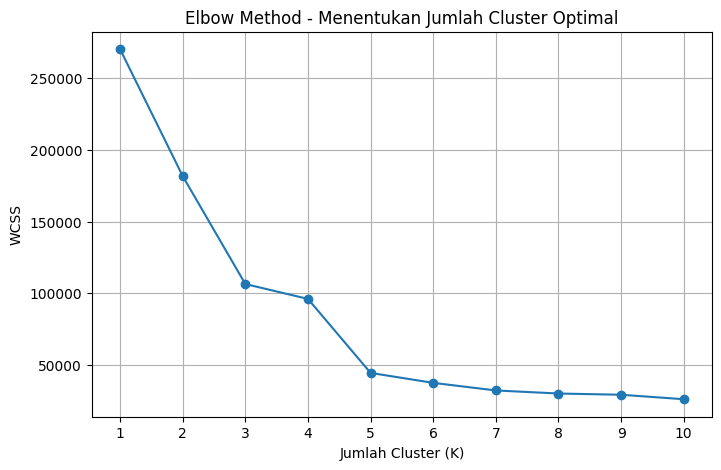

In [ ]:
# Visualisasi Elbow Method
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss_values, marker='o')
plt.title('Elbow Method - Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

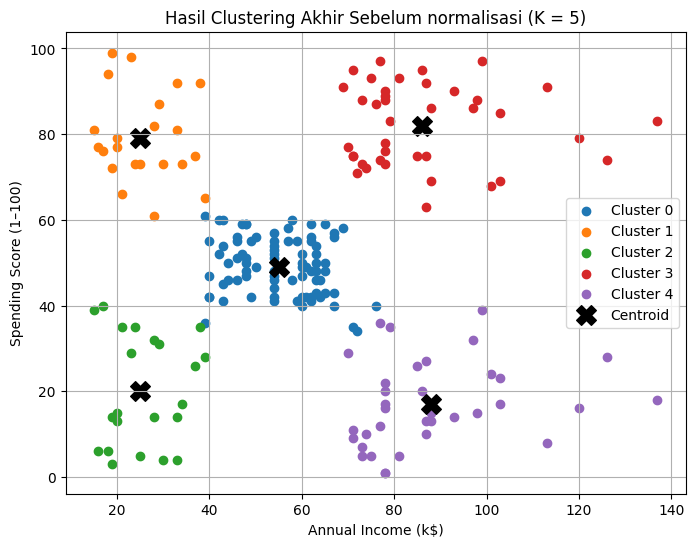

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(X, labels, centroids):
    """
    Menampilkan hasil clustering dalam scatter plot 2D.

    Args:
        X (ndarray): Data asli (n_samples, 2)
        labels (ndarray): Label cluster tiap data (n_samples,)
        centroids (ndarray): Posisi centroid akhir (k, 2)
    """
    plt.figure(figsize=(8, 6))

    # Plot titik data sesuai label
    for cluster_id in np.unique(labels):
        plt.scatter(
            X[labels == cluster_id, 0],
            X[labels == cluster_id, 1],
            label=f"Cluster {cluster_id}"
        )

    # Plot centroid
    plt.scatter(centroids[:, 0], centroids[:, 1],
                s=200, c='black', marker='X', label='Centroid')

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1–100)')
    plt.title('Hasil Clustering Akhir Sebelum normalisasi (K = 5)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Jalankan final clustering
final_k = 5
final_centroids, final_labels, _ = kmeans_manual(X, final_k)

# Visualisasikan hasilnya
plot_clusters(X, final_labels, final_centroids)


In [ ]:
# label final kalo nanti butuh di gabungkan
#df_clusters = df.copy()
#df_clusters['Cluster'] = final_labels


In [ ]:
# Gabungkan label cluster ke dataframe asli
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = final_labels

# Tampilkan data per klaster
for cluster_id in range(final_k):
    print(f"Data pada Klaster {cluster_id + 1}:")
    print(data_with_clusters[data_with_clusters['Cluster'] == cluster_id])
    print("\n" + "="*50 + "\n") # Pemisah antar klaster

Data pada Klaster 1:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
42           43    Male   48                  39                      36   
43           44  Female   31                  39                      61   
46           47  Female   50                  40                      55   
47           48  Female   27                  40                      47   
48           49  Female   29                  40                      42   
..          ...     ...  ...                 ...                     ...   
121         122  Female   38                  67                      40   
122         123  Female   40                  69                      58   
126         127    Male   43                  71                      35   
132         133  Female   25                  72                      34   
142         143  Female   28                  76                      40   

     Cluster  
42         0  
43         0  
46         0  
47    

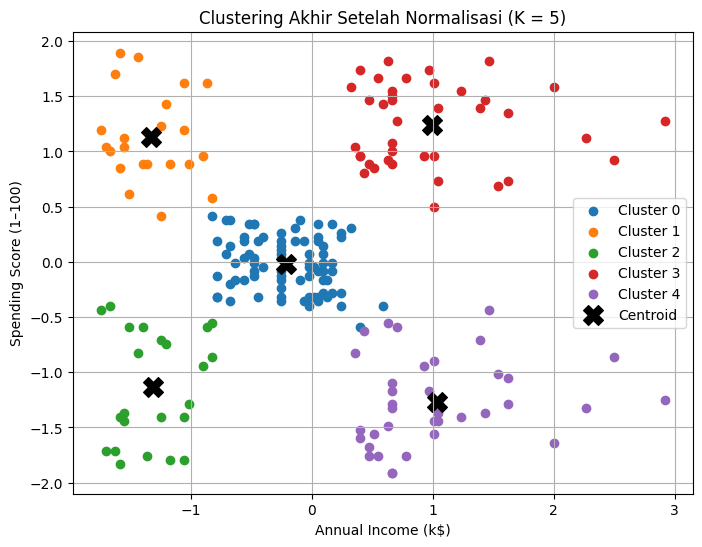

In [ ]:

def plot_clusters(X, labels, centroids):
    """
    Menampilkan hasil clustering dalam scatter plot 2D.

    Args:
        X (ndarray): Data asli (n_samples, 2)
        labels (ndarray): Label cluster tiap data (n_samples,)
        centroids (ndarray): Posisi centroid akhir (k, 2)
    """
    plt.figure(figsize=(8, 6))

    # Plot titik data sesuai label
    for cluster_id in np.unique(labels):
        plt.scatter(
            X[labels == cluster_id, 0],
            X[labels == cluster_id, 1],
            label=f"Cluster {cluster_id}"
        )

    # Plot centroid
    plt.scatter(centroids[:, 0], centroids[:, 1],
                s=200, c='black', marker='X', label='Centroid')

    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1–100)')
    # Mengubah judul plot
    plt.title('Clustering Akhir Setelah Normalisasi (K = 5)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 3. Jalankan KMeans manual pada data yang sudah dinormalisasi
centroids_norm, labels_norm, n_iter_norm = kmeans_manual(X_normalized, k=5)

# 4. Visualisasikan hasil cluster normalisasi
plot_clusters(X_normalized, labels_norm, centroids_norm)


In [ ]:
# Tampilkan data per klaster setelah normalisasi
data_with_clusters_norm = data.copy()
data_with_clusters_norm['Cluster'] = labels_norm

for cluster_id in range(final_k):
    print(f"Data pada Klaster {cluster_id + 1} (setelah Normalisasi):")
    print(data_with_clusters_norm[data_with_clusters_norm['Cluster'] == cluster_id])
    print("\n" + "="*50 + "\n")

Data pada Klaster 1 (setelah Normalisasi):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
43           44  Female   31                  39                      61   
46           47  Female   50                  40                      55   
47           48  Female   27                  40                      47   
48           49  Female   29                  40                      42   
49           50  Female   31                  40                      42   
..          ...     ...  ...                 ...                     ...   
120         121    Male   27                  67                      56   
121         122  Female   38                  67                      40   
122         123  Female   40                  69                      58   
126         127    Male   43                  71                      35   
142         143  Female   28                  76                      40   

     Cluster  
43         0  
46         0  

In [ ]:
def min_max_normalize(X):
    """
    Melakukan normalisasi Min-Max pada array 2D.
    Setiap fitur akan dipetakan ke rentang [0, 1].

    Args:
        X (ndarray): data input (n_samples, n_features)

    Returns:
        ndarray: data ternormalisasi
    """
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

# Gunakan pada data kamu
X_normalized = min_max_normalize(X)

In [ ]:
# Fungsi untuk menghitung silhouette score manual
def silhouette_score_manual(X, labels):
    n = len(X)
    silhouette_scores = []

    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = X[labels != labels[i]]

        if len(same_cluster) > 1:
            a = np.mean([np.linalg.norm(X[i] - x) for x in same_cluster if not np.array_equal(X[i], x)])
        else:
            a = 0

        b = np.inf
        for label in set(labels):
            if label != labels[i]:
                cluster_points = X[labels == label]
                dist = np.mean([np.linalg.norm(X[i] - x) for x in cluster_points])
                if dist < b:
                    b = dist

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_scores.append(s)

    return np.mean(silhouette_scores)


In [ ]:
# Fungsi untuk menghitung silhouette score manual
def silhouette_score_manual(X, labels):
    n = len(X)
    silhouette_scores = []

    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = X[labels != labels[i]]

        if len(same_cluster) > 1:
            a = np.mean([np.linalg.norm(X[i] - x) for x in same_cluster if not np.array_equal(X[i], x)])
        else:
            a = 0

        b = np.inf
        for label in set(labels):
            if label != labels[i]:
                cluster_points = X[labels == label]
                dist = np.mean([np.linalg.norm(X[i] - x) for x in cluster_points])
                if dist < b:
                    b = dist

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_scores.append(s)

    return np.mean(silhouette_scores)

# Gunakan centroid hasil akhir dari K-Means K=5 (dari klasterisasi data asli)
# Note: Centroid ini berasal dari klasterisasi data yang belum dinormalisasi (K=5)
# Untuk menghitung silhouette score pada data yang dinormalisasi,
# kita perlu menggunakan centroid yang dihitung dari data yang dinormalisasi (centroids_norm).
# Atau, jika ingin menggunakan centroid dari data asli, kita harus menormalisasinya.

# Centroid dari klasterisasi pada data asli (sebelum normalisasi)
raw_final_centroids = np.array([[86, 82], [44, 49], [87, 18]])

# Normalisasi centroid menggunakan fungsi yang sama seperti pada data X
# Perhatikan bahwa idealnya, scaler harus di-fit pada data training dan digunakan
# untuk transform data test dan centroid. Namun, karena kita menggunakan
# fungsi normalisasi manual pada seluruh X, kita gunakan fungsi yang sama.
normalized_final_centroids = min_max_normalize(raw_final_centroids) # Menggunakan fungsi min_max_normalize

# Hitung jarak ke masing-masing centroid yang sudah dinormalisasi
distances = np.array([[np.linalg.norm(x - c) for c in normalized_final_centroids] for x in X_normalized])

# Tentukan label berdasarkan jarak terdekat ke centroid yang dinormalisasi
labels = np.argmin(distances, axis=1)

# Hitung silhouette score manual menggunakan data yang dinormalisasi dan label yang sesuai
score = silhouette_score_manual(X_normalized, labels)
score

np.float64(0.42474192442262365)

In [ ]:
# Hitung statistik per cluster
cluster_stats = data_with_clusters_norm.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max', 'count'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
}).rename_axis('Cluster')

# Opsional: Tampilkan hasil statistik klaster
print(cluster_stats)

        Annual Income (k$)                Spending Score (1-100)        
                      mean min  max count                   mean min max
Cluster                                                                 
0                55.087500  39   76    80              49.712500  35  61
1                25.727273  15   39    22              79.363636  61  99
2                26.304348  15   39    23              20.913043   3  40
3                86.538462  69  137    39              82.128205  63  97
4                87.750000  70  137    36              17.583333   1  39


# DB Scans

In [ ]:
#Rekapitulasi Normalisasi Manual
def min_max_normalize(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

X_norm = min_max_normalize(X)


In [ ]:
eps = 0.15
minPts = 5
dbscan_labels = dbscan(X_norm, eps, minPts)

In [ ]:
# Fungsi jarak Euclidean manual
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Fungsi tetangga
def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

# DBSCAN from scratch
def dbscan(X, eps, minPts):
    n = len(X)
    labels = [-1] * n
    cluster_id = 0
    visited = [False] * n

    for i in range(n):
        if visited[i]:
            continue
        visited[i] = True
        neighbors = region_query(X, i, eps)

        if len(neighbors) < minPts:
            labels[i] = -1  # noise
        else:
            labels[i] = cluster_id
            seeds = neighbors.copy()
            seeds.remove(i)
            while seeds:
                current_point = seeds.pop()
                if not visited[current_point]:
                    visited[current_point] = True
                    current_neighbors = region_query(X, current_point, eps)
                    if len(current_neighbors) >= minPts:
                        for pt in current_neighbors:
                            if pt not in seeds:
                                seeds.append(pt)
                if labels[current_point] == -1:
                    labels[current_point] = cluster_id
            cluster_id += 1
    return labels

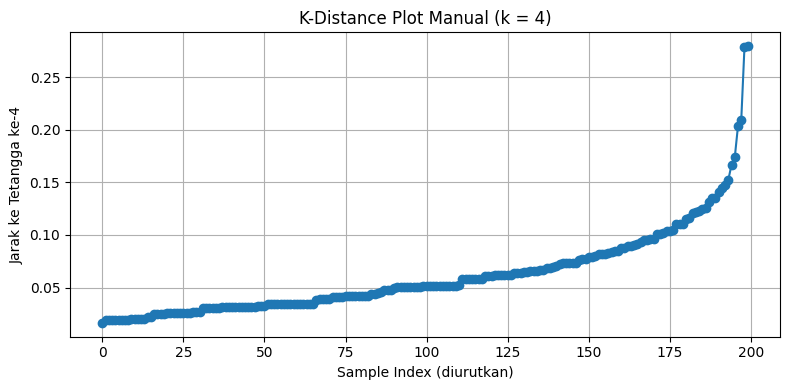

In [ ]:

# Plot manual distance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.sort(k_distance_manual), marker='o')
plt.title("K-Distance Plot Manual (k = 4)")
plt.xlabel("Sample Index (diurutkan)")
plt.ylabel("Jarak ke Tetangga ke-4")
plt.grid(True)
plt.tight_layout()
plt.show()


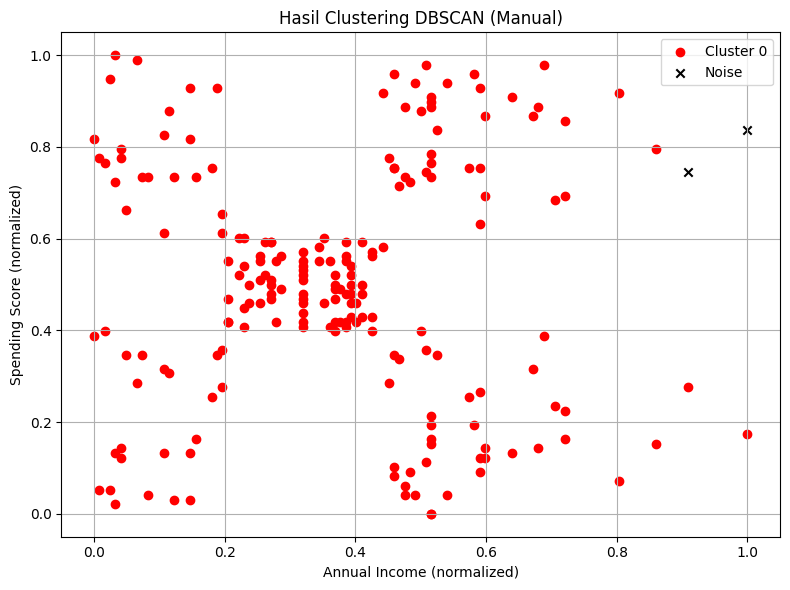

In [ ]:
# Visualisasi DBSCAN manual
plt.figure(figsize=(8, 6))

unique_labels = []
for label in dbscan_labels:
    if label not in unique_labels:
        unique_labels.append(label)

# Warna manual sederhana
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

for idx, label in enumerate(unique_labels):
    cluster_points = []
    for i in range(len(X_norm)):
        if dbscan_labels[i] == label:
            cluster_points.append(X_norm[i])
    cluster_points = np.array(cluster_points)

    if label == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='black', marker='x', label='Noise')
    else:
        color = color_palette[idx % len(color_palette)]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {label}')

plt.title('Hasil Clustering DBSCAN (Manual)')
plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [ ]:
# Hitung jumlah cluster dan noise
unique_labels_dbscan = set(dbscan_labels)
num_clusters = len([label for label in unique_labels_dbscan if label != -1])
num_noise = dbscan_labels.count(-1)

print(f"Jumlah cluster terbentuk: {num_clusters}")
print(f"Jumlah titik noise: {num_noise}")


Jumlah cluster terbentuk: 1
Jumlah titik noise: 2


In [ ]:
# Fungsi manual untuk menghitung Silhouette Score (tanpa sklearn)
def silhouette_score_manual(X, labels):
    n = len(X)
    silhouette_scores = []

    for i in range(n):
        same_cluster = [X[j] for j in range(n) if labels[j] == labels[i] and j != i]
        if same_cluster:
            a = np.mean([euclidean_distance(X[i], x) for x in same_cluster])
        else:
            a = 0

        b = np.inf
        for label in set(labels):
            if label != labels[i] and label != -1:
                other_cluster = [X[j] for j in range(n) if labels[j] == label]
                if other_cluster:
                    dist = np.mean([euclidean_distance(X[i], x) for x in other_cluster])
                    if dist < b:
                        b = dist

        s = (b - a) / max(a, b) if max(a, b) != 0 else 0
        silhouette_scores.append(s)

    return np.mean(silhouette_scores)

# Hitung silhouette score manual untuk DBSCAN
sil_score_dbscan = silhouette_score_manual(X_norm, dbscan_labels)

# Hitung jumlah cluster dan noise
unique_labels_dbscan = set(dbscan_labels)
num_clusters = len([label for label in unique_labels_dbscan if label != -1])
num_noise = dbscan_labels.count(-1)

# Tampilkan
sil_score_dbscan, num_clusters, num_noise


<ipython-input-51-4092525156>:22: RuntimeWarning: invalid value encountered in scalar divide
  s = (b - a) / max(a, b) if max(a, b) != 0 else 0


(np.float64(nan), 1, 2)

In [ ]:
# Solusi: Jalankan ulang DBSCAN dengan eps lebih kecil agar dapat lebih dari 1 cluster
# Coba eps = 0.12

def dbscan(X, eps, minPts):
    n = len(X)
    labels = [-1] * n
    cluster_id = 0
    visited = [False] * n

    for i in range(n):
        if visited[i]:
            continue
        visited[i] = True
        neighbors = region_query(X, i, eps)

        if len(neighbors) < minPts:
            labels[i] = -1  # noise
        else:
            labels[i] = cluster_id
            seeds = neighbors.copy()
            seeds.remove(i)
            while seeds:
                current_point = seeds.pop()
                if not visited[current_point]:
                    visited[current_point] = True
                    current_neighbors = region_query(X, current_point, eps)
                    if len(current_neighbors) >= minPts:
                        for pt in current_neighbors:
                            if pt not in seeds:
                                seeds.append(pt)
                if labels[current_point] == -1:
                    labels[current_point] = cluster_id
            cluster_id += 1
    return labels

# Jalankan ulang DBSCAN dengan eps = 0.12
eps_new = 0.12
minPts = 5
dbscan_labels = dbscan(X_norm, eps_new, minPts)

# Evaluasi ulang hasil clustering
unique_labels_dbscan = set(dbscan_labels)
num_clusters = len([label for label in unique_labels_dbscan if label != -1])
num_noise = dbscan_labels.count(-1)

# Hitung silhouette score jika cluster > 1
if num_clusters > 1:
    sil_score_dbscan = silhouette_score_manual(X_norm, dbscan_labels)
else:
    sil_score_dbscan = None

sil_score_dbscan, num_clusters, num_noise


(np.float64(0.37842662965876556), 2, 9)

In [ ]:
# prompt: Gabungkan data asli dengan hasil cluster

# Gabungkan label cluster DBSCAN ke dataframe asli
data_with_dbscan_clusters = data.copy()
data_with_dbscan_clusters['DBSCAN_Cluster'] = dbscan_labels

# Tampilkan data per klaster DBSCAN
print("\n" + "="*50 + "\n")
print("Data per Klaster DBSCAN:")
print("\n" + "="*50 + "\n")

# Filter out noise points for cluster-wise printing
for cluster_id in sorted(list(set(dbscan_labels))):
    if cluster_id != -1:
        print(f"Data pada Klaster DBSCAN {cluster_id + 1}:") # Add 1 for readability
        print(data_with_dbscan_clusters[data_with_dbscan_clusters['DBSCAN_Cluster'] == cluster_id])
        print("\n" + "-"*30 + "\n")
    else:
        print("Data Noise (DBSCAN):")
        print(data_with_dbscan_clusters[data_with_dbscan_clusters['DBSCAN_Cluster'] == -1])
        print("\n" + "-"*30 + "\n")




Data per Klaster DBSCAN:


Data Noise (DBSCAN):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
11           12  Female   35                  19                      99   
191         192  Female   32                 103                      69   
192         193    Male   33                 113                       8   
194         195  Female   47                 120                      16   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     DBSCAN_Cluster  
11               -1  
191              -1  
192              -1  
194              -1  
195              -1  
196              -1  
197              -1  
198          

In [ ]:
# Buat DataFrame baru untuk fitur + label
df_dbscan = data_with_dbscan_clusters[['Annual Income (k$)', 'Spending Score (1-100)', 'DBSCAN_Cluster']]

In [ ]:
# Hitung statistik per cluster (kecuali noise -1)
cluster_profile = df_dbscan[df_dbscan['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max', 'count'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
}).rename_axis('Cluster')

In [ ]:
data_with_dbscan_clusters.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
kmeans_score = 0.445  # Silhouette Score KMeans
dbscan_score = sil_score_dbscan  # Sudah dihitung sebelumnya
kmeans_clusters = 3              # Misalnya KMeans menghasilkan 3 cluster
dbscan_clusters = num_clusters   # Dari hasil eps = 0.12
dbscan_noise = num_noise

# Susun ringkasan evaluasi
eval_df = pd.DataFrame({
    "Model": ["K-Means", "DBSCAN"],
    "Jumlah Cluster": [kmeans_clusters, dbscan_clusters],
    "Jumlah Noise": [0, dbscan_noise],
    "Silhouette Score": [kmeans_score, dbscan_score]
})

In [ ]:
# prompt: tampilkan hasilnya untuk code diatas

print("\nRingkasan Evaluasi Model Clustering:")
print(eval_df)

# Interpretasi
print("\nInterpretasi:")
if dbscan_score is not None and dbscan_score > kmeans_score:
    print("DBSCAN menunjukkan Silhouette Score yang lebih tinggi, menunjukkan pemisahan klaster yang lebih baik.")
elif dbscan_score is not None and dbscan_score < kmeans_score:
    print("K-Means menunjukkan Silhouette Score yang lebih tinggi.")
else:
    print("Perbandingan Silhouette Score tidak dapat dilakukan karena DBSCAN tidak membentuk lebih dari satu klaster atau menghasilkan noise.")

if dbscan_noise > 0:
    print(f"DBSCAN mengidentifikasi {dbscan_noise} titik data sebagai noise.")

print(f"\nProfil Klaster K-Means (K=5, Sebelum Normalisasi):")
# Tampilkan profil klaster K-Means (dari data_with_clusters)
for cluster_id in range(final_k):
    print(f"\nKlaster {cluster_id + 1}:")
    print(data_with_clusters[data_with_clusters['Cluster'] == cluster_id].describe().loc[['mean', 'min', 'max', 'count']])

print(f"\nProfil Klaster DBSCAN (eps={eps_new}, minPts={minPts}):")
# Tampilkan profil klaster DBSCAN (dari cluster_profile)
cluster_profile



Ringkasan Evaluasi Model Clustering:
     Model  Jumlah Cluster  Jumlah Noise  Silhouette Score
0  K-Means               3             0          0.445000
1   DBSCAN               2             9          0.378427

Interpretasi:
K-Means menunjukkan Silhouette Score yang lebih tinggi.
DBSCAN mengidentifikasi 9 titik data sebagai noise.

Profil Klaster K-Means (K=5, Sebelum Normalisasi):

Klaster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
mean    85.792683  42.780488           55.097561               49.353659   
min     43.000000  18.000000           39.000000               34.000000   
max    143.000000  70.000000           76.000000               61.000000   
count   82.000000  82.000000           82.000000               82.000000   

       Cluster  
mean       0.0  
min        0.0  
max        0.0  
count     82.0  

Klaster 2:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
mean    23.090909  25.272727           25.72

Annual Income (k$)                Spending Score (1-100)        
                      mean min  max count                   mean min max
Cluster                                                                 
0                52.705128  15  103   156               42.74359   1  98
1                82.542857  69  113    35               82.80000  63  97